# Student Academic Prediction Pipline
Dataset source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv',sep=';')

In [4]:
target_map = {'Dropout':0,'Graduate':1,'Enrolled':2}
target_map_r = {0:'Dropout',1:'Graduate',2:'Enrolled'}

In [5]:
df['Target'] = df['Target'].map(target_map) 

## Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Statistik Deskriptif

In [7]:
#Tipe data features

categorical = ['Marital status','Application mode','Course','Daytime/evening attendance\t','Previous qualification','Nacionality',
              "Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced",
              "Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","International","Target"]
numeric = [col for col in df.columns if col not in categorical]

In [8]:
df[numeric].describe()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Visualisasi Data

#### Categorical Features

C:\Users\hanif\.conda\envs\ml_envy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


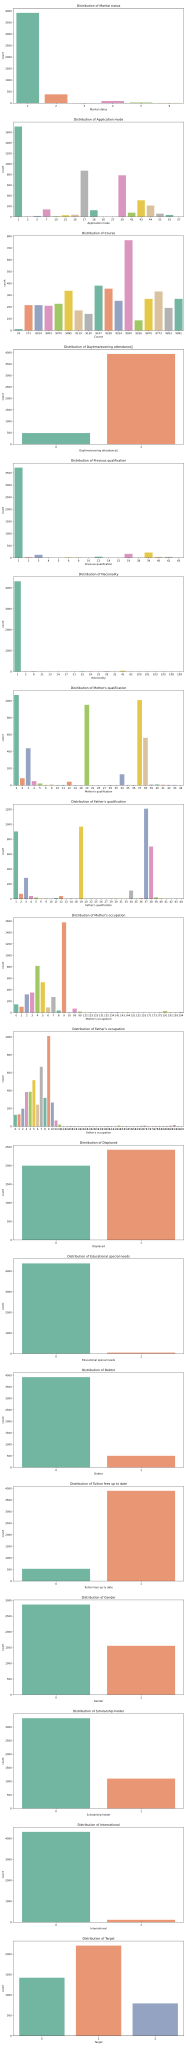

In [9]:
fig,axs = plt.subplots(len(categorical),1,figsize=(12,8*len(categorical)))
for i in range(len(categorical)):
    sns.countplot(data=df,x=categorical[i],hue=categorical[i],ax=axs[i],palette='Set2',legend=False)
    axs[i].set_title(f'Distribution of {categorical[i]}')
plt.show()

#### Numeric Features

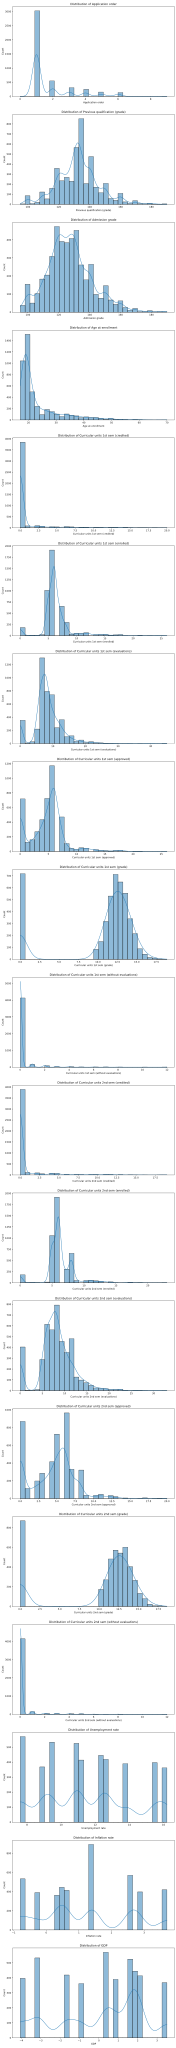

In [10]:
# Histogram
fig,axs=plt.subplots(len(numeric),1,figsize=(12,8*len(numeric)))
for i in range(len(numeric)):
    sns.histplot(data=df,x=numeric[i],bins=30,kde=True,ax=axs[i])
    axs[i].set_title(f'Distribution of {numeric[i]}')
plt.show()

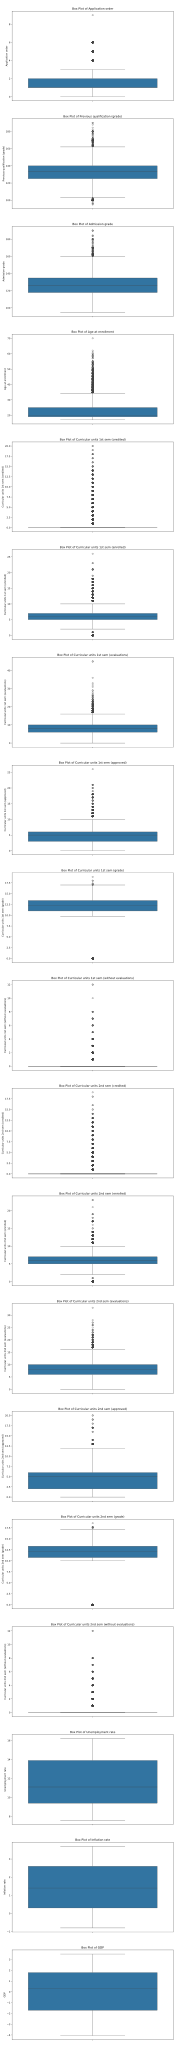

In [11]:
# Box Plot
fig,axs=plt.subplots(len(numeric),1,figsize=(12,8*len(numeric)))
for i in range(len(numeric)):
    sns.boxplot(data=df,y=numeric[i],ax=axs[i])
    axs[i].set_title(f'Box Plot of {numeric[i]}')
plt.show()

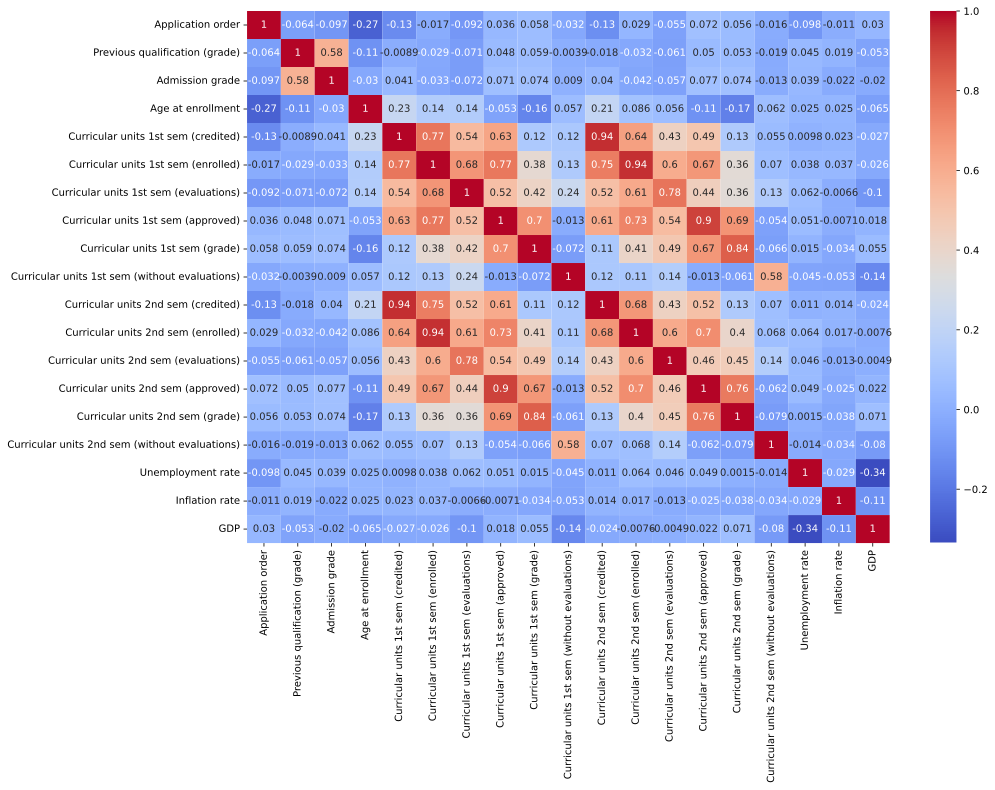

In [12]:
# Pairplot
plt.figure(figsize=(12*1.2,8*1.2))
corr_matrix = df[numeric].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

### Pengecekan Missing Data

In [13]:
df.isna().mean()

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

## Data Preprocessing


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Categorical Feature Encoding

In [15]:
df['International'].value_counts(ascending=False).iloc[0]/len(df)

0.9751356238698011

In [16]:
def get_top_n_class(cat_feature,n=1):
    return cat_feature.value_counts(ascending=False).iloc[:n].index

In [17]:
# Marital status
df['Marital status'] = df['Marital status'].apply(lambda x: x if x == 1 else 0)
# Application mode
df['Application mode'] = df['Application mode'].apply(lambda x: x if x in get_top_n_class(df['Application mode'],7) else -1)
# Previous qualification
df['Previous qualification'] = df['Previous qualification'].apply(lambda x: x if x in get_top_n_class(df['Previous qualification']) else 0)
# Mother's qualification
df["Mother's qualification"] = df["Mother's qualification"].apply(lambda x: x if x in get_top_n_class(df["Mother's qualification"],5) else -1)
# Father's qualification
df["Father's qualification"] = df["Father's qualification"].apply(lambda x: x if x in get_top_n_class(df["Father's qualification"],5) else -1)
# Mother's occupation
df["Mother's occupation"] = df["Mother's occupation"].apply(lambda x: x if x in get_top_n_class(df["Mother's occupation"],10) else -1)
# Father's occupation
df["Father's occupation"] = df["Father's occupation"].apply(lambda x: x if x in get_top_n_class(df["Father's occupation"],12) else -1)

C:\Users\hanif\.conda\envs\ml_envy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


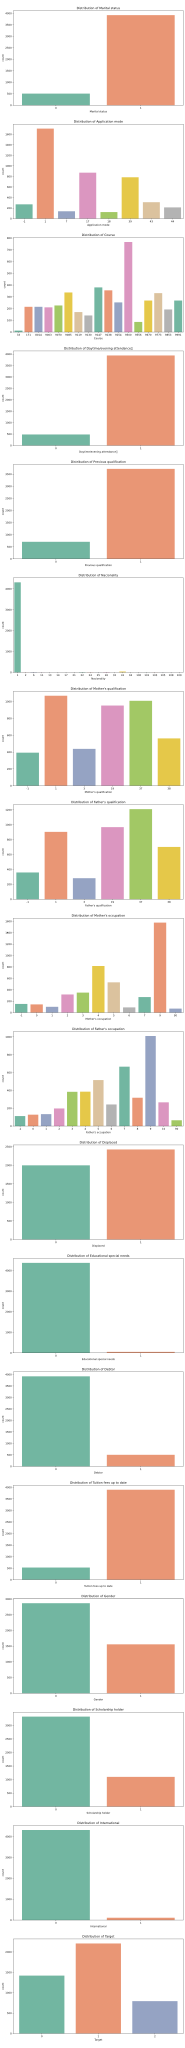

In [18]:
fig,axs = plt.subplots(len(categorical),1,figsize=(12,8*len(categorical)))
for i in range(len(categorical)):
    sns.countplot(data=df,x=categorical[i],hue=categorical[i],ax=axs[i],palette='Set2',legend=False)
    axs[i].set_title(f'Distribution of {categorical[i]}')
plt.show()

### Spliting Data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Target',axis=1),
                                                 df['Target'],
                                                 shuffle=True,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df['Target'])

### Handling Outlier

In [20]:
def remove_outlier(data,label,feature_name,l_limit,h_limit):
    without_outlier = (data[feature_name] >= l_limit) & (data[feature_name] <= h_limit)
    data = data[without_outlier]
    label = label[without_outlier]
    return data,label

In [21]:
X_train.shape

(3539, 36)

In [22]:
# X_train,y_train = remove_outlier(X_train,y_train,'Application order',0,3)
# X_train,y_train = remove_outlier(X_train,y_train,'Previous qualification (grade)',100,160)
# X_train,y_train = remove_outlier(X_train,y_train,'Admission grade',50,160)
# X_train,y_train = remove_outlier(X_train,y_train,'Age at enrollment',0,35)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 1st sem (enrolled)',1,10)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 1st sem (evaluations)',0,15)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 1st sem (approved)',0,10)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 1st sem (grade)',10,17)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 2nd sem (evaluations)',0,15)
# X_train,y_train = remove_outlier(X_train,y_train,'Curricular units 2nd sem (grade)',10,17.5)

In [23]:
X_train.shape

(3539, 36)

## Feature Engineering

### Feature Selection

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [25]:
#,'Educational special needs','International'
useless_features=['Nacionality']
X_train.drop(useless_features,axis=1,inplace=True)
X_test.drop(useless_features,axis=1,inplace=True)

In [26]:
# X_train.drop(['Curricular units 2nd sem (credited)',
#               'Curricular units 2nd sem (enrolled)',
#               'Curricular units 2nd sem (approved)',
#              'Curricular units 1st sem (credited)',
#              'Curricular units 1st sem (without evaluations)',
#              'Curricular units 2nd sem (without evaluations)'],inplace=True,axis=1)
# X_test.drop(['Curricular units 2nd sem (credited)',
#               'Curricular units 2nd sem (enrolled)',
#               'Curricular units 2nd sem (approved)',
#              'Curricular units 1st sem (credited)',
#              'Curricular units 1st sem (without evaluations)',
#              'Curricular units 2nd sem (without evaluations)'],inplace=True,axis=1)

In [27]:
X_train.shape,X_test.shape

((3539, 35), (885, 35))

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 8 to 2973
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance	                     3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Previous qualification (grade)                  3539 non-null   float64
 7   Mother's qualification                          3539 non-null   int64  
 8   Father's qualification                          3539 non-null   int64  
 9   Mother's occupation                           

In [29]:
categorical_ = []
for c in categorical:
    if c not in useless_features and c != "Target":
        categorical_.append(c)

## Model Selection

In [30]:
from catboost import CatBoostClassifier, Pool

In [31]:
X_train.shape,y_train.shape

((3539, 35), (3539,))

In [32]:
train_pool = Pool(X_train,y_train,cat_features=categorical_)
test_pool = Pool(X_test,y_test,cat_features=categorical_)

In [ ]:
model = CatBoostClassifier(iterations=1000,loss_function='MultiClass',verbose=True,learning_rate=0.01)
model.fit(train_pool)

0:	learn: 1.0903322	total: 192ms	remaining: 3m 11s
1:	learn: 1.0823849	total: 247ms	remaining: 2m 3s
2:	learn: 1.0750839	total: 317ms	remaining: 1m 45s
3:	learn: 1.0684986	total: 381ms	remaining: 1m 34s
4:	learn: 1.0607839	total: 449ms	remaining: 1m 29s
5:	learn: 1.0537709	total: 491ms	remaining: 1m 21s
6:	learn: 1.0465376	total: 557ms	remaining: 1m 18s
7:	learn: 1.0406747	total: 598ms	remaining: 1m 14s
8:	learn: 1.0342550	total: 664ms	remaining: 1m 13s
9:	learn: 1.0278179	total: 727ms	remaining: 1m 11s
10:	learn: 1.0220644	total: 795ms	remaining: 1m 11s
11:	learn: 1.0155748	total: 861ms	remaining: 1m 10s
12:	learn: 1.0094929	total: 906ms	remaining: 1m 8s
13:	learn: 1.0038870	total: 971ms	remaining: 1m 8s
14:	learn: 0.9981435	total: 1.03s	remaining: 1m 8s
15:	learn: 0.9925927	total: 1.1s	remaining: 1m 7s
16:	learn: 0.9870577	total: 1.17s	remaining: 1m 7s
17:	learn: 0.9813924	total: 1.24s	remaining: 1m 7s
18:	learn: 0.9754370	total: 1.31s	remaining: 1m 7s
19:	learn: 0.9707314	total: 1.3

In [ ]:
pred = model.predict(test_pool)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test,pred)

In [ ]:
print(report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rcf = RandomForestClassifier(random_state=42)

In [ ]:
rcf.fit(X_train,y_train)

In [ ]:
pred = rcf.predict(X_test)

In [ ]:
report_rcf = classification_report(y_test,pred) 

In [ ]:
print(report_rcf)

## Hypterparameter Tuning

## Testing Model